In [3]:
import pandas as pd

#import data
file_name = "bankrupt_data.csv"

In [4]:
df = pd.read_csv(filepath_or_buffer = file_name, encoding = 'latin-1')

In [5]:
#check row and columns
df.shape

(6819, 96)

In [6]:
#check if there are missing values
df.info()
#There is no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Bankrupt?                                                            6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest             6819 non-null   float64
 2    ROA(A) before interest and % after tax                              6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax                   6819 non-null   float64
 4    operating gross margin                                              6819 non-null   float64
 5    realized sales gross margin                                         6819 non-null   float64
 6    operating profit rate                                               6819 non-null   float64
 7    tax P

In [7]:
#check if there are duplicated values
df.duplicated().sum()

0

In [8]:
#method1 to check how many companies went bankrupt
count = df['Bankrupt?'].value_counts(sort = False)
count

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [9]:
#calculate percentage of bankruptcy
percent = lambda part, whole: float(part) / float(whole) * 100
no_bankruptcy = percent(count.loc[0],len(df))
yes_bankruptcy = percent(count.loc[1],len(df))
print(no_bankruptcy, yes_bankruptcy)

96.77372048687491 3.2262795131250916


In [10]:
#remove space from columns

a = df.columns.tolist()
a = [x.strip(' ') for x in a]

df.columns = a

df.columns

Index(['Bankrupt?', 'ROA(C) before interest and depreciation before interest',
       'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'operating gross margin', 'realized sales gross margin',
       'operating profit rate', 'tax Pre-net interest rate',
       'after-tax net interest rate',
       'non-industry income and expenditure/revenue',
       'continuous interest rate (after tax)', 'operating expense rate',
       'research and development expense rate', 'cash flow rate',
       'interest-bearing debt interest rate', 'tax rate (A)',
       'per Net Share Value (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan)',
       'Operating Profit Per Share (Yuan)',
       'Per Share Net profit before tax (yuan)',
       'realized sales gross profit growth rate',
       'operating profit growth rate', 'after-tax net p

net income to total assets                                -0.315457
ROA(A) before interest and % after tax                    -0.282941
ROA(B) before interest and depreciation after tax         -0.273051
ROA(C) before interest and depreciation before interest   -0.260807
net worth/assets                                          -0.250161
                                                             ...   
current liabilities to current assets                      0.171306
borrowing dependency                                       0.176543
current liability to assets                                0.194494
equity to liability                                       -0.083048
debt ratio %                                               0.250161
Length: 95, dtype: float64


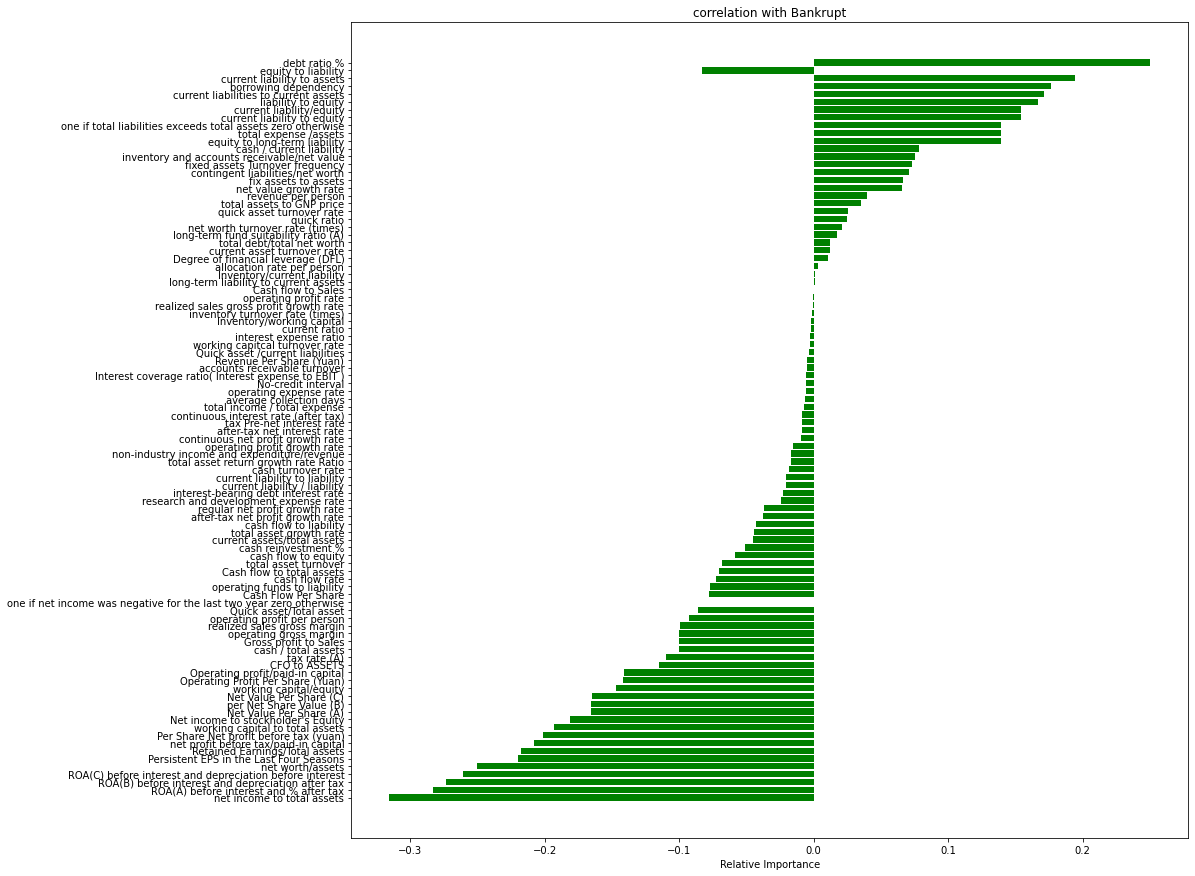

In [42]:
#feature selection using the filter method
import numpy as np 
import matplotlib.pyplot as plt

X = df.iloc[:,1:]
y = df['Bankrupt?']

importances = X.apply(lambda x:x.corr(y))
indices = np.argsort(importances)
print(importances[indices])

names= df.columns[1:]

plt.figure(figsize = (15, 15))

plt.title('correlation with Bankrupt')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [67]:
#set the treshold to the absolute value of 0.10
a = []

for i in range(0, len(indices)):
    if np.abs(importances[i])>0.10:     
        a.append(names[i])
        print(names[i])

print(len(a))

X = df.loc[:, a]

ROA(C) before interest and depreciation before interest
ROA(A) before interest and % after tax
ROA(B) before interest and depreciation after tax
operating gross margin
tax rate (A)
per Net Share Value (B)
Net Value Per Share (A)
Net Value Per Share (C)
Persistent EPS in the Last Four Seasons
Operating Profit Per Share (Yuan)
Per Share Net profit before tax (yuan)
debt ratio %
net worth/assets
borrowing dependency
Operating profit/paid-in capital
net profit before tax/paid-in capital
working capital to total assets
cash / total assets
current liability to assets
working capital/equity
current liability/equity
Retained Earnings/Total assets
total expense /assets
current liability to equity
equity to long-term liability
CFO to ASSETS
current liabilities to current assets
one if total liabilities exceeds total assets zero otherwise
net income to total assets
Gross profit to Sales
Net income to stockholder's Equity
liability to equity
32


In [117]:
#drop the features that have a correlation higher than 90% with other independent variables.

corr = X.corr()

columns = np.full((corr.shape[0],), True, dtype=bool)

for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
                
selected_columns = X.columns[columns]

df2 = pd.concat([df[['Bankrupt?', 'net income to total assets', 'Cash flow to total assets', 'tax Pre-net interest rate', 'inventory and accounts receivable/net value']],X[selected_columns]], axis=1)
df2.shape



#We have 21 features



(6819, 26)

In [118]:
#now we want to split the dataset into training and test sets
from sklearn.model_selection import KFold, StratifiedKFold

x = df2.iloc[:,1:]
y = df2['Bankrupt?']

#use K-fold function to split data. 80% of the data will be training set and the rest of it will be test set.
skf = StratifiedKFold(n_splits = 5, shuffle = False)

for train_index, test_index in skf.split(x, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    original_xtrain, original_xtest = x.iloc[train_index], x.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

TRAIN: [1104 1118 1132 ... 6816 6817 6818] TEST: [   0    1    2 ... 1383 1384 1385]
TRAIN: [   0    1    2 ... 6816 6817 6818] TEST: [1104 1118 1132 ... 2796 2797 2798]
TRAIN: [   0    1    2 ... 6816 6817 6818] TEST: [1860 1861 1862 ... 4136 4137 4138]
TRAIN: [   0    1    2 ... 6816 6817 6818] TEST: [2100 2147 2148 ... 5475 5476 5477]
TRAIN: [   0    1    2 ... 5475 5476 5477] TEST: [3749 3908 4071 ... 6816 6817 6818]


In [119]:
import numpy as np 

#check if the percentage of bankruptcy is similar between the train set and the test set 
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts = True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts = True)

print(train_counts_label/len(original_ytrain))
print(test_counts_label/len(original_ytest))

#The distribution of bankruptcy is similar to the original dataset.

[0.96774194 0.03225806]
[0.96771827 0.03228173]


In [120]:
#export a training set and a test set as csv
original_xtrain.to_csv(r'C:\Users\jeongjaehui\Documents\Stats_404\JEONG-JAEHEE\bankrupt_training_set.csv', index = False, header=True)
original_xtest.to_csv(r'C:\Users\jeongjaehui\Documents\Stats_404\JEONG-JAEHEE\bankrupt_test_set.csv', index = False, header=True)

In [121]:
original_xtrain.shape

(5456, 25)

In [122]:

'''
#splite the data into training and valiation sets
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(original_xtrain, original_ytrain, test_size = 0.1, random_state = 0,stratify = original_ytrain, shuffle = True)
'''

'\n#splite the data into training and valiation sets\nfrom sklearn.model_selection import train_test_split\n\nx_train, x_val, y_train, y_val = train_test_split(original_xtrain, original_ytrain, test_size = 0.1, random_state = 0,stratify = original_ytrain, shuffle = True)\n'

In [201]:
#use GridSearch CV to find the best parameters

from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

clf = CatBoostClassifier()

params = {'iterations': [500],
          'depth': [4, 5, 6],
          'loss_function': ['Logloss'],
          'l2_leaf_reg': np.logspace(-20, -19, 3),
          'leaf_estimation_iterations': [10],
#           'eval_metric': ['Accuracy'],
#           'use_best_model': ['True'],
          'logging_level':['Silent'],
          'random_seed': [42],
          'scale_pos_weight': [29]
         }

          
scorer = make_scorer(accuracy_score)
clf_grid = GridSearchCV(estimator = clf, param_grid = params, scoring = scorer, cv = 3)


clf_grid.fit(original_xtrain, original_ytrain)
best_param = clf_grid.best_params_
best_param

{'depth': 6,
 'iterations': 500,
 'l2_leaf_reg': 1e-20,
 'leaf_estimation_iterations': 10,
 'logging_level': 'Silent',
 'loss_function': 'Logloss',
 'random_seed': 42,
 'scale_pos_weight': 29}

In [211]:
#fit the best model
cat = CatBoostClassifier(iterations=500,
                           loss_function=best_param['loss_function'],
                           depth=best_param['depth'],
                           l2_leaf_reg=best_param['l2_leaf_reg'],
                           eval_metric='Accuracy',
                           leaf_estimation_iterations=10,
                           use_best_model=True,
                           logging_level='Silent',
                           random_seed=42,
                           class_weights = (1, 30)
                          )

In [212]:
#splite the data into training and valiation sets

x_train, x_val, y_train, y_val = train_test_split(original_xtrain, original_ytrain, test_size = 0.1, random_state = 0,stratify = original_ytrain, shuffle = True)

In [213]:
cat_model = cat.fit(x_train,y_train,eval_set = (x_val,y_val))

cat_pred = cat_model.predict(x_val)

In [214]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_val, cat_pred))

#create a confusion matrix using the validation set
print(pd.DataFrame(confusion_matrix(y_val, cat_pred), columns = ['Predicted Nagative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive']))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92       528
           1       0.14      0.67      0.23        18

    accuracy                           0.86       546
   macro avg       0.56      0.76      0.58       546
weighted avg       0.96      0.86      0.90       546

                 Predicted Nagative  Predicted Positive
Actual Negative                 455                  73
Actual Positive                   6                  12


In [217]:
cat_pred = cat_model.predict(original_xtest)

print(classification_report(original_ytest, cat_pred))

#create a confusion matrix using the validation set
print(pd.DataFrame(confusion_matrix(original_ytest, cat_pred), columns = ['Predicted Nagative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive']))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1319
           1       0.23      0.86      0.37        44

    accuracy                           0.90      1363
   macro avg       0.61      0.88      0.66      1363
weighted avg       0.97      0.90      0.93      1363

                 Predicted Nagative  Predicted Positive
Actual Negative                1195                 124
Actual Positive                   6                  38


In [216]:
#check features' importance of this model
feat_imp_cat = cat_model.get_feature_importance(prettified=True)

important_features = feat_imp_cat.loc[feat_imp_cat['Importances'] > 0]
#important_features[0] = important_features[0].iloc[:,0]

important_features

,Feature Id,Importances
0,Retained Earnings/Total assets,14.706013
1,debt ratio %,11.790696
2,CFO to ASSETS,10.430987
3,tax rate (A),10.047285
4,total expense /assets,9.458699
5,Persistent EPS in the Last Four Seasons,9.410828
6,Net income to stockholder's Equity,6.677467
7,borrowing dependency,6.664850
8,net worth/assets,6.520154
9,equity to long-term liability,6.173112


In [161]:
from catboost import CatBoostClassifier

params = {'loss_function':'Logloss',
          'eval_metric':'BalancedAccuracy',
          'verbose': 176,
          'class_weights': [0.95, 0.05]
         }

cat = CatBoostClassifier(**params)
cat_model = cat.fit(x_train,y_train,
                     eval_set = (x_val,y_val),
                     use_best_model=True,
                     verbose = 0,
                     plot=True)

cat_pred = cat_model.predict(x_val)

cat_model = cat.fit(x_train,y_train,eval_set = (x_val,y_val))

cat_pred = cat_model.predict(x_val)

print(classification_report(y_val, cat_pred))

#create a confusion matrix using the validation set
print(pd.DataFrame(confusion_matrix(y_val, cat_pred), columns = ['Predicted Nagative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive']))

In [192]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

#data_dmatrix = xgb.DMatrix(data=x_train,label=y_train)

xg = xgb.XGBClassifier(n_estimators=25, max_depth=8, learning_rate=0.1, subsample=0.5, scale_pos_weight=30, use_label_encoder=False, objective = 'binary:logistic', seed=0)
xg_model = xg.fit(x_train,y_train)
xg_preds = xg_model.predict(x_val)
print(classification_report(y_val, xg_preds))

#create a confusion matrix using the validation set
print(pd.DataFrame(confusion_matrix(y_val, xg_preds), columns = ['Predicted Nagative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive']))

[23:19:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       528
           1       0.30      0.39      0.34        18

    accuracy                           0.95       546
   macro avg       0.64      0.68      0.66       546
weighted avg       0.96      0.95      0.95       546

                 Predicted Nagative  Predicted Positive
Actual Negative                 512                  16
Actual Positive                  11                   7


In [191]:
xg_pred = log_model.predict(original_xtest)

#check a classification
print(classification_report(original_ytest, xg_pred))

print(pd.DataFrame(confusion_matrix(original_ytest, xg_pred), columns = ['Predicted Nagative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive']))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1319
           1       0.27      0.89      0.41        44

    accuracy                           0.92      1363
   macro avg       0.63      0.90      0.68      1363
weighted avg       0.97      0.92      0.94      1363

                 Predicted Nagative  Predicted Positive
Actual Negative                1211                 108
Actual Positive                   5                  39


In [221]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
random = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt',
                               class_weight='balanced',
                               random_state=0
                              )
# Fit on training data
random_model = random.fit(x_train, y_train)

random_pred = random_model.predict(x_val)

#check a classification
print(classification_report(y_val, random_pred))

print(pd.DataFrame(confusion_matrix(y_val, random_pred), columns = ['Predicted Nagative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive']))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       528
           1       0.75      0.17      0.27        18

    accuracy                           0.97       546
   macro avg       0.86      0.58      0.63       546
weighted avg       0.96      0.97      0.96       546

                 Predicted Nagative  Predicted Positive
Actual Negative                 527                   1
Actual Positive                  15                   3


In [222]:
random_pred = random_model.predict(original_xtest)

#check a classification
print(classification_report(original_ytest, random_pred))

print(pd.DataFrame(confusion_matrix(original_ytest, random_pred), columns = ['Predicted Nagative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive']))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1319
           1       0.67      0.05      0.09        44

    accuracy                           0.97      1363
   macro avg       0.82      0.52      0.53      1363
weighted avg       0.96      0.97      0.95      1363

                 Predicted Nagative  Predicted Positive
Actual Negative                1318                   1
Actual Positive                  42                   2


In [162]:
from sklearn.linear_model import LogisticRegression

#generate a logistics regression model

log_reg = LogisticRegression(class_weight='balanced', max_iter=10000)
log_model = log_reg.fit(x_train, y_train)
log_pred = log_model.predict(x_val)

from sklearn.metrics import classification_report

#check a classification
print(classification_report(y_val, log_pred))

print(pd.DataFrame(confusion_matrix(y_val, log_pred), columns = ['Predicted Nagative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive']))

              precision    recall  f1-score   support

           0       0.99      0.85      0.92       528
           1       0.16      0.83      0.27        18

    accuracy                           0.85       546
   macro avg       0.58      0.84      0.59       546
weighted avg       0.97      0.85      0.89       546

                 Predicted Nagative  Predicted Positive
Actual Negative                 448                  80
Actual Positive                   3                  15


In [155]:
log_pred = log_model.predict(original_xtest)

#check a classification
print(classification_report(original_ytest, log_pred))

print(pd.DataFrame(confusion_matrix(original_ytest, log_pred), columns = ['Predicted Nagative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive']))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1319
           1       0.27      0.89      0.41        44

    accuracy                           0.92      1363
   macro avg       0.63      0.90      0.68      1363
weighted avg       0.97      0.92      0.94      1363

                 Predicted Nagative  Predicted Positive
Actual Negative                1211                 108
Actual Positive                   5                  39


In [223]:
#check coefficient
log_model.coef_[0]

array([-5.64645519, -2.30368098,  0.29282987, -0.58534949, -9.4778343 ,
       -0.23728496, -1.66897574, -2.69471925, -5.1812037 , -1.93279215,
        7.22918719, -7.22709206,  1.39923908, -1.89119281, -5.20773073,
        1.51516908, -0.42313053, -0.03815154, -2.71201899, -0.69479676,
        1.47102128, -1.01593443,  1.08336021, -0.17858781, -0.28216997])

In [229]:
probs = log_model.predict_proba(original_xtest)

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(original_ytest, probs[:, 1])

f1 = f1_score(original_ytest, probs[:, 1])
auc = auc(recall, precision)

# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (f1, auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

NameError: name 'metrics' is not defined

AUC: 0.93


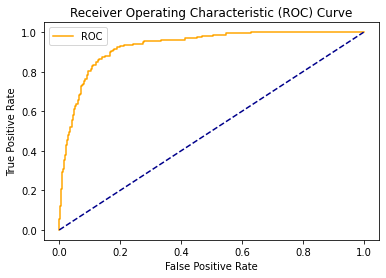

In [224]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
#Define a python function to plot the ROC curves.
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
#plot a ROC Curve
probs = log_model.predict_proba(x_train)
positive_probs = probs[:, 1]
auc = roc_auc_score(y_train, positive_probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_train, positive_probs)
plot_roc_curve(fpr, tpr)

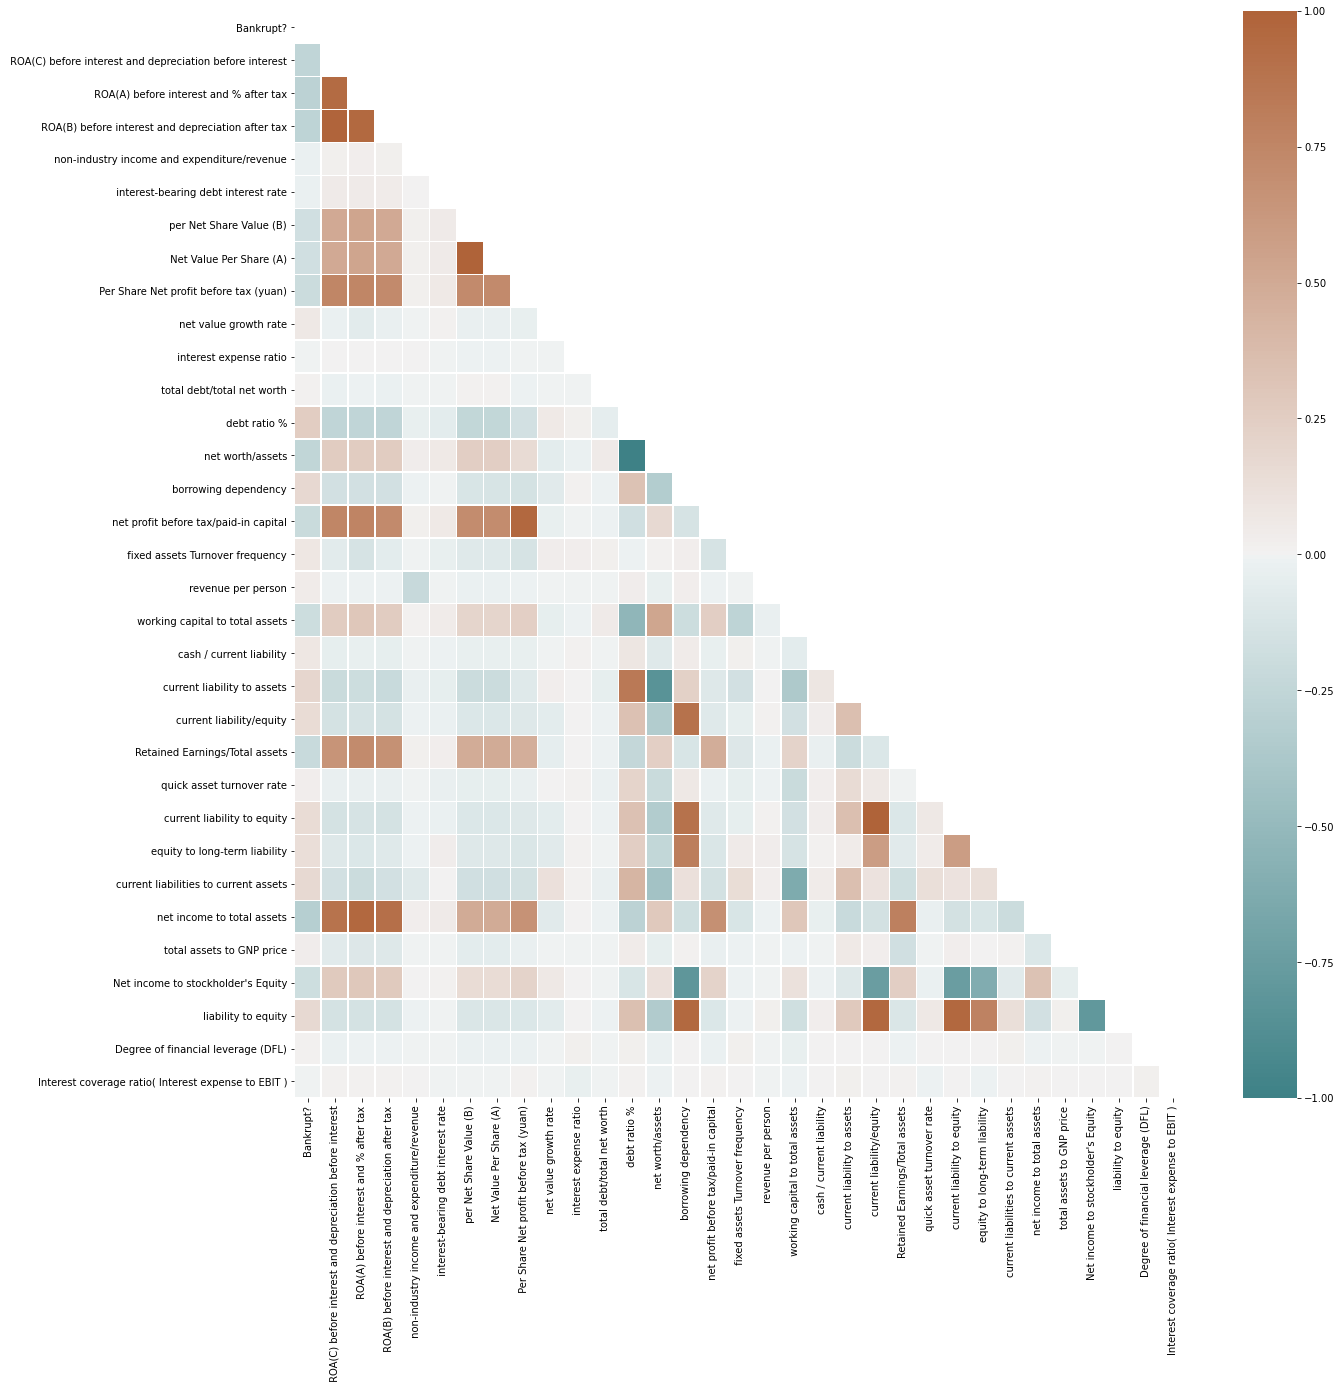

In [61]:
#perform EDA

#create a correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 20))

#using mask to have a triangle correlation heatmap
#mask = np.triu(np.ones_like(df2.corr(), dtype=np.bool))
corr = np.corrcoef(np.random.randn(33, 1089))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

#set the color of the heatmap
cmap = sns.diverging_palette(200, 30, as_cmap=True)
sns.heatmap(df2.corr(), mask = mask, cmap = cmap, linewidths=.5)
plt.show()

ValueError: Could not interpret input ' cash flow rate'

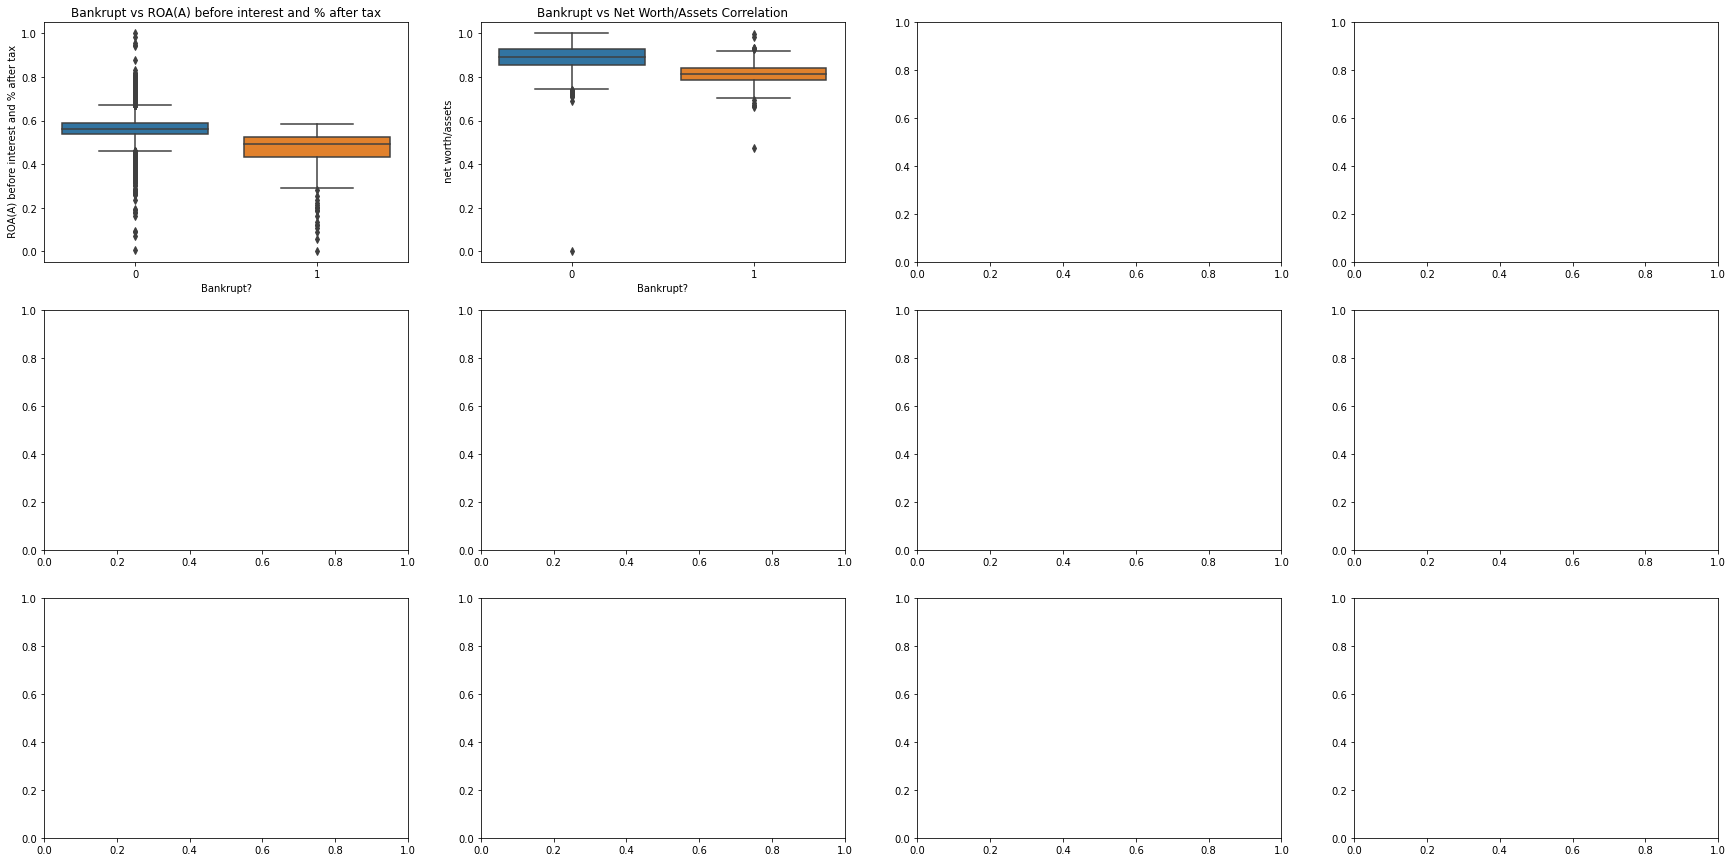

In [64]:
#plot feature with an interesting correlation

fig , ax = plt.subplots(nrows=3, ncols = 4, figsize=(30,15))

sns.boxplot(x='Bankrupt?', y=" ROA(A) before interest and % after tax", data=df2, ax=ax[0,0])
ax[0,0].set_title('Bankrupt vs ROA(A) before interest and % after tax')

sns.boxplot(x='Bankrupt?', y=" ROA(B) before interest and depreciation after tax", data=df2, ax=ax[0,1])  
ax[0,1].set_title('Bankrupt vs ROA(B) before interest and depreciation after tax') 

sns.boxplot(x='Bankrupt?', y=" per Net Share Value (B)", data=df2, ax=ax[0,2])
ax[0,2].set_title('Bankrupt vs per Net Share Value (B)')

sns.boxplot(x='Bankrupt?', y=" Per Share Net profit before tax (yuan)", data=df2, ax=ax[0,3]) 
ax[0,3].set_title('Bankrupt vs Per Share Net profit before tax (yuan)')

###

sns.boxplot(x='Bankrupt?', y=" net worth/assets", data=df2, ax=ax[1,0])
ax[1,0].set_title('Bankrupt vs net worth/assets')

sns.boxplot(x='Bankrupt?', y=" net profit before tax/paid-in capital", data=df2, ax=ax[1,1])  
ax[1,1].set_title('Bankrupt vs net profit before tax/paid-in capital') 

sns.boxplot(x='Bankrupt?', y="liability to equity", data=df2, ax=ax[1,2])
ax[1,2].set_title('Bankrupt vs liability to equity')

sns.boxplot(x='Bankrupt?', y=" operating profit per person", data=df2, ax=ax[1,3]) 
ax[1,3].set_title('Bankrupt vs operating profit per person')

###

sns.boxplot(x='Bankrupt?', y=" working capital to total assets", data=df2, ax=ax[2,0])
ax[2,0].set_title('Bankrupt vs working capital to total assets')

sns.boxplot(x='Bankrupt?', y="operating funds to liability", data=df2, ax=ax[2,1])  
ax[2,1].set_title('Bankrupt vs operating funds to liability') 

sns.boxplot(x='Bankrupt?', y="current liability to assets", data=df2, ax=ax[2,2])
ax[2,2].set_title('Bankrupt vs current liability to assets')

sns.boxplot(x='Bankrupt?', y="cash / total assets", data=df2, ax=ax[2,3]) 
ax[2,3].set_title('Bankrupt vs cash / total assets')

plt.show()

/Users/jeongjaehui/opt/anaconda3/envs/env-stats404-w20/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jeongjaehui/opt/anaconda3/envs/env-stats404-w20/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jeongjaehui/opt/anaconda3/envs/env-stats404-w20/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Plea

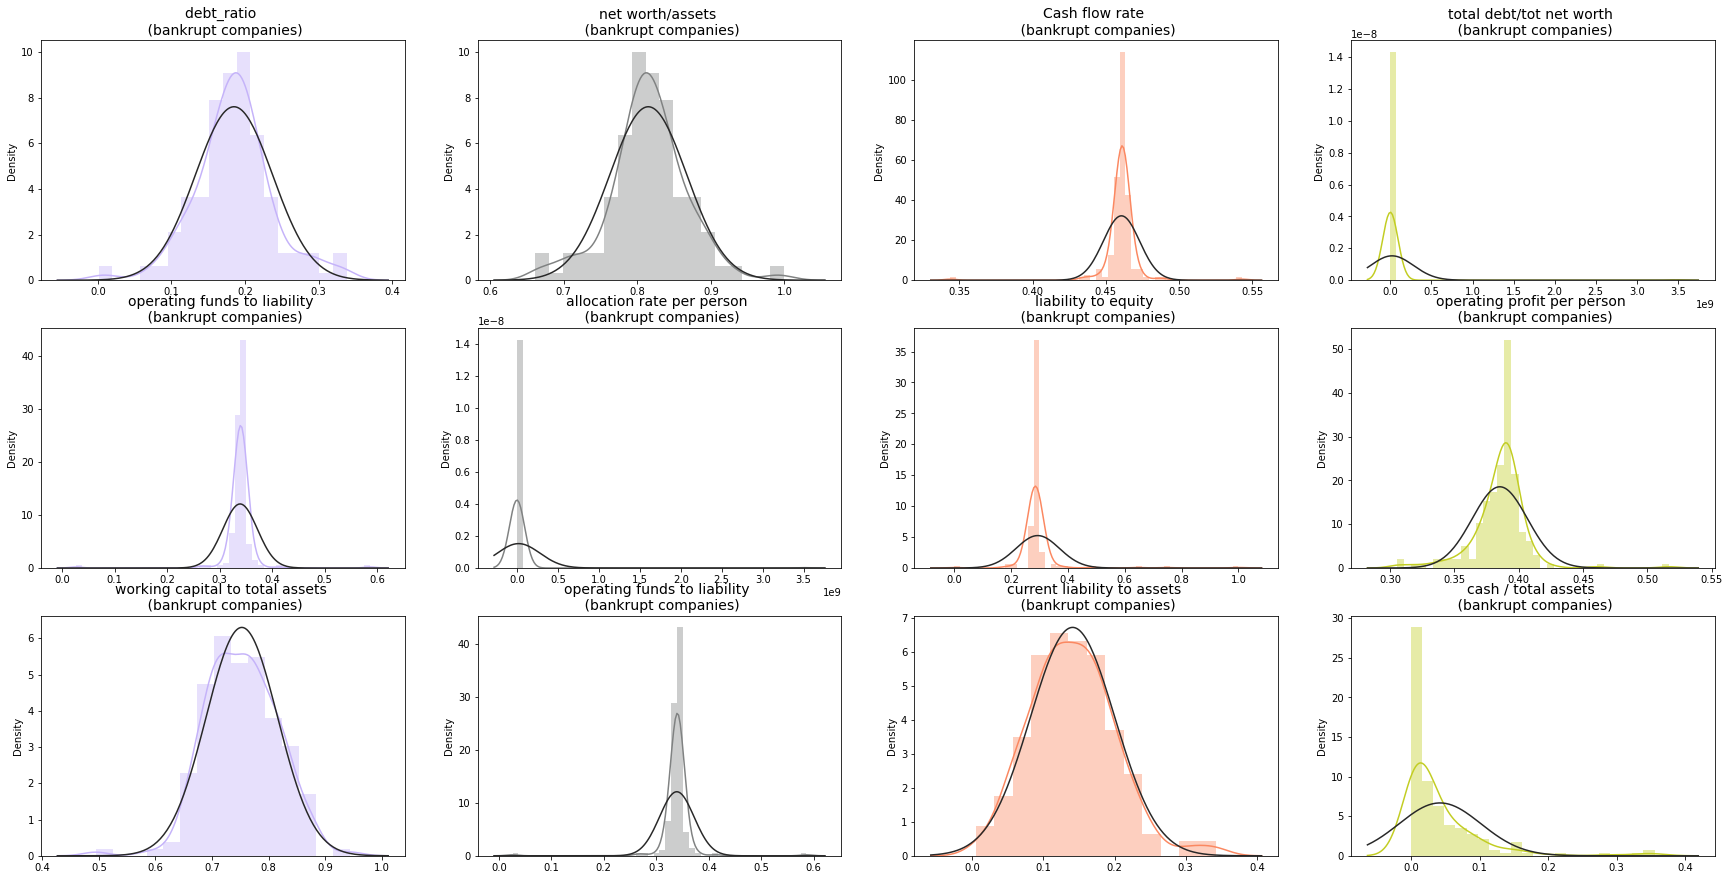

In [21]:
#plot the festure distributions for bankrupt companies

from scipy.stats import norm

fig, ax = plt.subplots(3,4, figsize=(30, 15))

debt_ratio = df2[' debt ratio %'].loc[df2['Bankrupt?'] == 1].values
sns.distplot(debt_ratio,ax=ax[0,0], fit=norm, color='#C5B3F9')
ax[0,0].set_title('debt_ratio \n (bankrupt companies)', fontsize=14)

net_worth_assets = df2[' net worth/assets'].loc[df2['Bankrupt?'] == 1].values
sns.distplot(net_worth_assets,ax=ax[0,1], fit=norm, color='#808282')
ax[0,1].set_title('net worth/assets \n (bankrupt companies)', fontsize=14)

cash_flow_rate = df2[' cash flow rate'].loc[df2['Bankrupt?'] == 1].values
sns.distplot(cash_flow_rate,ax=ax[0,2], fit=norm, color='#FB8861')
ax[0,2].set_title('Cash flow rate \n (bankrupt companies)', fontsize=14)

tot_debt_net = df2[' total debt/total net worth'].loc[df2['Bankrupt?'] == 1].values
sns.distplot(tot_debt_net ,ax=ax[0,3], fit=norm, color='#C2CD23')
ax[0,3].set_title('total debt/tot net worth \n (bankrupt companies)', fontsize=14)

###

debt_ratio = df2['operating funds to liability'].loc[df2['Bankrupt?'] == 1].values
sns.distplot(debt_ratio,ax=ax[1,0], fit=norm, color='#C5B3F9')
ax[1,0].set_title('operating funds to liability \n (bankrupt companies)', fontsize=14)

net_worth_assets = df2[' allocation rate per person'].loc[df2['Bankrupt?'] == 1].values
sns.distplot(net_worth_assets,ax=ax[1,1], fit=norm, color='#808282')
ax[1,1].set_title('allocation rate per person \n (bankrupt companies)', fontsize=14)

cash_flow_rate = df2['liability to equity'].loc[df2['Bankrupt?'] == 1].values
sns.distplot(cash_flow_rate,ax=ax[1,2], fit=norm, color='#FB8861')
ax[1,2].set_title('liability to equity \n (bankrupt companies)', fontsize=14)

tot_debt_net = df2[' operating profit per person'].loc[df2['Bankrupt?'] == 1].values
sns.distplot(tot_debt_net ,ax=ax[1,3], fit=norm, color='#C2CD23')
ax[1,3].set_title('operating profit per person \n (bankrupt companies)', fontsize=14)

###

debt_ratio = df2[' working capital to total assets'].loc[df2['Bankrupt?'] == 1].values
sns.distplot(debt_ratio,ax=ax[2,0], fit=norm, color='#C5B3F9')
ax[2,0].set_title('working capital to total assets \n (bankrupt companies)', fontsize=14)

net_worth_assets = df2['operating funds to liability'].loc[df2['Bankrupt?'] == 1].values
sns.distplot(net_worth_assets,ax=ax[2,1], fit=norm, color='#808282')
ax[2,1].set_title('operating funds to liability \n (bankrupt companies)', fontsize=14)

cash_flow_rate = df2['current liability to assets'].loc[df2['Bankrupt?'] == 1].values
sns.distplot(cash_flow_rate,ax=ax[2,2], fit=norm, color='#FB8861')
ax[2,2].set_title('current liability to assets \n (bankrupt companies)', fontsize=14)

tot_debt_net = df2['cash / total assets'].loc[df2['Bankrupt?'] == 1].values
sns.distplot(tot_debt_net ,ax=ax[2,3], fit=norm, color='#C2CD23')
ax[2,3].set_title('cash / total assets \n (bankrupt companies)', fontsize=14)

plt.show()

In [22]:
#Perform feature engineering.
#standardize data
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()

names = list(df2)
standard = pd.DataFrame(scale.fit_transform(df2), columns = names)

standard.loc[standard['Bankrupt?'] == -1] = 0
standard

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,operating gross margin,realized sales gross margin,operating profit rate,tax Pre-net interest rate,after-tax net interest rate,non-industry income and expenditure/revenue,...,net income to total assets,total assets to GNP price,No-credit interval,Gross profit to Sales,Net income to stockholder's Equity,liability to equity,Degree of financial leverage (DFL),Interest coverage ratio( Interest expense to EBIT ),one if net income was negative for the last two year zero otherwise,equity to liability
0,1.0,-0.262644,-0.245987,-0.176908,-0.607459,-0.611774,-0.052449,0.105869,0.104442,0.134550,...,-0.113967,-0.085543,-0.029158,-0.607418,0.069187,-0.118688,-0.106298,-0.045412,0.0,-0.197634
1,1.0,-2.361330,-2.285701,-2.446488,0.236714,0.236232,-0.219553,-0.086538,-0.043580,-0.024153,...,-2.596714,-0.085543,0.001720,0.236485,-0.139573,-0.151621,-0.102520,0.005124,0.0,-0.105824
2,1.0,0.210210,-0.189424,0.260100,-0.886342,-0.891924,0.016326,0.120462,0.110920,0.128221,...,-0.108764,-0.085543,0.085312,-0.886211,0.046356,0.012595,-0.112920,-0.147984,0.0,-0.324903
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
348,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
349,1.0,-0.339974,-0.195196,-0.289412,-0.929330,-0.935107,-0.253120,0.065535,0.072324,0.155507,...,-0.107095,-0.085543,0.103278,-0.929400,0.090822,-0.236909,-0.102964,-0.000551,0.0,12.568400
350,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


/Users/jeongjaehui/opt/anaconda3/envs/env-stats404-w20/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jeongjaehui/opt/anaconda3/envs/env-stats404-w20/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jeongjaehui/opt/anaconda3/envs/env-stats404-w20/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Plea

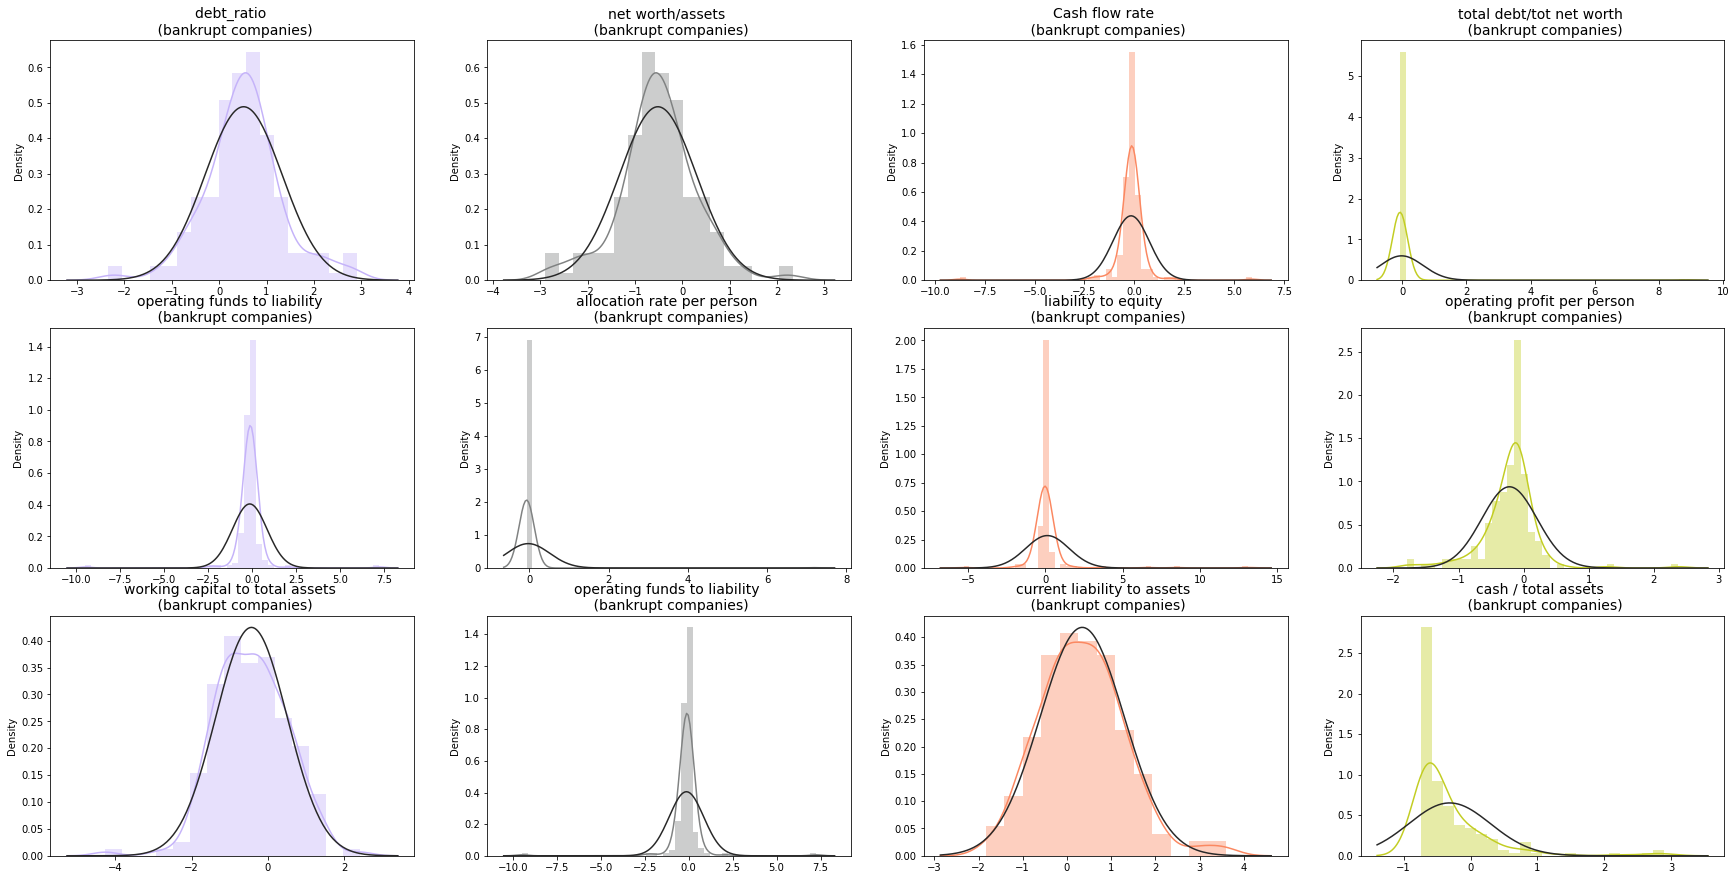

In [23]:
#plot the festure distributions again for bankrupt companies with the standardized data

from scipy.stats import norm

fig, ax = plt.subplots(3,4, figsize=(30, 15))

debt_ratio = standard[' debt ratio %'].loc[standard['Bankrupt?'] == 1].values
sns.distplot(debt_ratio,ax=ax[0,0], fit=norm, color='#C5B3F9')
ax[0,0].set_title('debt_ratio \n (bankrupt companies)', fontsize=14)

net_worth_assets = standard[' net worth/assets'].loc[standard['Bankrupt?'] == 1].values
sns.distplot(net_worth_assets,ax=ax[0,1], fit=norm, color='#808282')
ax[0,1].set_title('net worth/assets \n (bankrupt companies)', fontsize=14)

cash_flow_rate = standard[' cash flow rate'].loc[standard['Bankrupt?'] == 1].values
sns.distplot(cash_flow_rate,ax=ax[0,2], fit=norm, color='#FB8861')
ax[0,2].set_title('Cash flow rate \n (bankrupt companies)', fontsize=14)

tot_debt_net = standard[' total debt/total net worth'].loc[standard['Bankrupt?'] == 1].values
sns.distplot(tot_debt_net ,ax=ax[0,3], fit=norm, color='#C2CD23')
ax[0,3].set_title('total debt/tot net worth \n (bankrupt companies)', fontsize=14)

###

debt_ratio = standard['operating funds to liability'].loc[standard['Bankrupt?'] == 1].values
sns.distplot(debt_ratio,ax=ax[1,0], fit=norm, color='#C5B3F9')
ax[1,0].set_title('operating funds to liability \n (bankrupt companies)', fontsize=14)

net_worth_assets = standard[' allocation rate per person'].loc[standard['Bankrupt?'] == 1].values
sns.distplot(net_worth_assets,ax=ax[1,1], fit=norm, color='#808282')
ax[1,1].set_title('allocation rate per person \n (bankrupt companies)', fontsize=14)

cash_flow_rate = standard['liability to equity'].loc[standard['Bankrupt?'] == 1].values
sns.distplot(cash_flow_rate,ax=ax[1,2], fit=norm, color='#FB8861')
ax[1,2].set_title('liability to equity \n (bankrupt companies)', fontsize=14)

tot_debt_net = standard[' operating profit per person'].loc[standard['Bankrupt?'] == 1].values
sns.distplot(tot_debt_net ,ax=ax[1,3], fit=norm, color='#C2CD23')
ax[1,3].set_title('operating profit per person \n (bankrupt companies)', fontsize=14)

###

debt_ratio = standard[' working capital to total assets'].loc[standard['Bankrupt?'] == 1].values
sns.distplot(debt_ratio,ax=ax[2,0], fit=norm, color='#C5B3F9')
ax[2,0].set_title('working capital to total assets \n (bankrupt companies)', fontsize=14)

net_worth_assets = standard['operating funds to liability'].loc[standard['Bankrupt?'] == 1].values
sns.distplot(net_worth_assets,ax=ax[2,1], fit=norm, color='#808282')
ax[2,1].set_title('operating funds to liability \n (bankrupt companies)', fontsize=14)

cash_flow_rate = standard['current liability to assets'].loc[standard['Bankrupt?'] == 1].values
sns.distplot(cash_flow_rate,ax=ax[2,2], fit=norm, color='#FB8861')
ax[2,2].set_title('current liability to assets \n (bankrupt companies)', fontsize=14)

tot_debt_net = standard['cash / total assets'].loc[standard['Bankrupt?'] == 1].values
sns.distplot(tot_debt_net ,ax=ax[2,3], fit=norm, color='#C2CD23')
ax[2,3].set_title('cash / total assets \n (bankrupt companies)', fontsize=14)

plt.show()

#When we look at the plots, the distributions are the same. Therefore, we will use the original data instead of the standardized data.

In [24]:
from sklearn.model_selection import train_test_split

#split 'Bankrupt?' variable from df2

y2 = df2['Bankrupt?']
x2 = df2.drop(['Bankrupt?'], axis = 1)

#splite the data into training and valiation sets

x_train, x_val, y_train, y_val = train_test_split(x2, y2, test_size = 0.1, random_state = 2,stratify = y2, shuffle = True)


In [25]:
from sklearn.linear_model import LogisticRegression

#generate a logistics regression model

log_reg = LogisticRegression()
log_model = log_reg.fit(x_train, y_train)
log_pred = log_model.predict(x_val)

from sklearn.metrics import classification_report

#check a classification
print(classification_report(y_val, log_pred))


              precision    recall  f1-score   support

           0       0.60      0.83      0.70        18
           1       0.73      0.44      0.55        18

    accuracy                           0.64        36
   macro avg       0.66      0.64      0.62        36
weighted avg       0.66      0.64      0.62        36



In [26]:
#check coefficient
log_model.coef_[0]

array([-1.59394091e-17, -1.86065963e-17, -1.66873715e-17,  4.13562955e-18,
        4.15307147e-18,  1.03434228e-17,  8.07506111e-18,  8.18632185e-18,
        2.88872699e-18,  7.91290749e-18,  1.37017340e-12, -4.80120505e-11,
        3.64927794e-18, -3.92066663e-09, -1.90735013e-17, -5.72779395e-18,
       -5.77083244e-18, -5.74151538e-18, -7.74055355e-18,  2.47676081e-18,
       -1.22595324e-18, -3.77667209e-18, -7.06068916e-18,  3.06416863e-19,
        8.46367765e-18,  6.09179509e-18,  6.10043616e-18,  2.08015892e-18,
       -4.53344127e-11,  3.83079571e-09,  2.51758342e-18,  4.08282053e-18,
       -1.95332792e-18, -1.65343086e-11,  6.58340457e-18, -1.26371982e-10,
        2.11435327e-17, -1.07268661e-17, -8.24179174e-20,  6.92375373e-18,
        1.88553577e-19, -3.70416640e-18, -6.64196123e-18,  5.14758432e-18,
       -4.28730981e-18,  9.49956261e-10,  7.29088562e-11,  6.63485131e-11,
        8.90826905e-11,  2.44171319e-18,  5.48950135e-09, -1.30874170e-18,
       -3.17019940e-09, -

In [28]:
print(classification_report(y_val, cat_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       0.88      0.83      0.86        18

    accuracy                           0.86        36
   macro avg       0.86      0.86      0.86        36
weighted avg       0.86      0.86      0.86        36



In [30]:
#apply the logistic regression model to the training set
#estimate 1 (baseline) model and evaluate model performance
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

y_training_set = df1['Bankrupt?']
x_training_set = df1.drop(['Bankrupt?'], axis = 1)

In [31]:
#apply the logistic regression model to the training set
#estimate 1 (baseline) model and evaluate model performance


y_training_set = df1.loc[:,'Bankrupt?']
x_training_set = df1.iloc[:,1:]

training set
              precision    recall  f1-score   support

           0       0.98      0.65      0.78      5280
           1       0.05      0.57      0.10       176

    accuracy                           0.65      5456
   macro avg       0.52      0.61      0.44      5456
weighted avg       0.95      0.65      0.76      5456

                 Predicted Nagative  Predicted Positive
Actual Negative                3452                1828
Actual Positive                  75                 101
AUC: 0.65


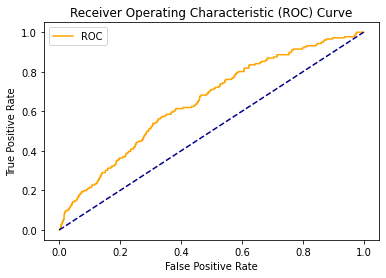

In [32]:
log_pred = log_model.predict(x_training_set)
print('training set')
print(classification_report(y_training_set, log_pred))
#The accuracy is 65%.

#create a confusion matrix using the training set
print(pd.DataFrame(confusion_matrix(y_training_set, log_pred), columns = ['Predicted Nagative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive']))

#Define a python function to plot the ROC curves.
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
#plot a ROC Curve
probs = log_model.predict_proba(x_training_set)
positive_probs = probs[:, 1]
auc = roc_auc_score(y_training_set, positive_probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_training_set, positive_probs)
plot_roc_curve(fpr, tpr)



In [33]:
#apply the logistic regression model to the test set
df3 = original_xtest
y_test_set = df3['Bankrupt?']
x_test_set = df3.drop(['Bankrupt?'], axis = 1)
print('------------------------------------------------------ \n test set')
log_pred = log_model.predict(x_test_set)
print(classification_report(y_test_set, log_pred))
#The accuracy is 81%. Even though the accuracy is high, since the labels are highly unbalanced, the accuracy is not important.

------------------------------------------------------ 
 test set
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      1319
           1       0.05      0.32      0.09        44

    accuracy                           0.79      1363
   macro avg       0.51      0.56      0.49      1363
weighted avg       0.94      0.79      0.86      1363



training set
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      5280
           1       0.16      0.86      0.26       176

    accuracy                           0.84      5456
   macro avg       0.57      0.85      0.59      5456
weighted avg       0.97      0.84      0.89      5456

AUC: 0.92


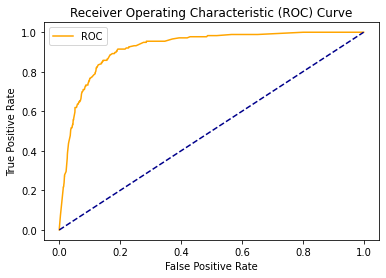

In [34]:
#estimate 1 (different) model and/or loss function to improve model performance
#apply the catboost model to the training set

cat_pred = cat_model.predict(x_training_set)
print('training set')
print(classification_report(y_training_set, cat_pred))
#The accuracy is 83%.

#plot a ROC Curve
probs = cat_model.predict_proba(x_training_set)
positive_probs = probs[:, 1]
auc = roc_auc_score(y_training_set, positive_probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_training_set, positive_probs)
plot_roc_curve(fpr, tpr)

In [35]:
#apply the catboost model to the test set
cat_pred = cat_model.predict(x_test_set)
print('------------------------------------------------------ \n test set')
print(classification_report(y_test_set, cat_pred))
#The accuracy is 88%.

------------------------------------------------------ 
 test set
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1319
           1       0.21      0.89      0.34        44

    accuracy                           0.89      1363
   macro avg       0.60      0.89      0.64      1363
weighted avg       0.97      0.89      0.92      1363



In [36]:
#when the random state of train_test_split is 2.
print(important_features)

0      non-industry income and expenditure/revenue
1                                 net worth/assets
2                          Net Value Per Share (C)
3                              liability to equity
4                            Gross profit to Sales
5                           interest expense ratio
6                      Inventory/current liability
7                        Cash flow to total assets
8                       net income to total assets
9                        tax Pre-net interest rate
10                   current liability / liability
11     inventory and accounts receivable/net value
Name: Feature Id, dtype: object


AUC: 0.41


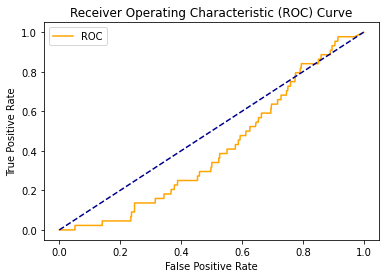

In [37]:
#use only these 12 features to generate a logistics regression model
#since there was an error using the small subset that has balanced labels, I used training set and used class_weight parameter.

log_reg = LogisticRegression(class_weight='balanced', max_iter=10000)
X = x_training_set[important_features]
log_model = log_reg.fit(X, y_training_set)
log_pred = log_model.predict(x_test_set[important_features])

#plot a ROC Curve
probs = log_model.predict_proba(x_test_set[important_features])
positive_probs = probs[:, 1]
auc = roc_auc_score(y_test_set, positive_probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test_set, positive_probs)
plot_roc_curve(fpr, tpr)

18 randome state


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

(6,)
AUC: 0.96


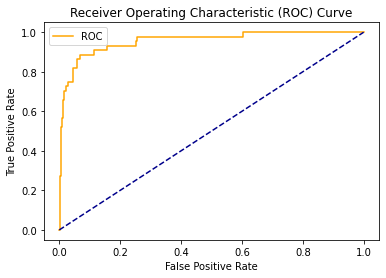

In [38]:
#The impartant features were changed depending on random state, therefore we want to check if there are better features that can predict the target value.

for i in range(18,19):
    print(i, 'randome state')
    x_train, x_val, y_train, y_val = train_test_split(x2, y2, test_size = 0.1, random_state = i,stratify = y2, shuffle = True)

    #generate a model with random state 7
    params = {'loss_function':'Logloss',
              'eval_metric':'BalancedAccuracy',
              #'verbose': 200,
             }

    cat = CatBoostClassifier(**params)
    cat_model = cat.fit(x_train,y_train,
                         eval_set = (x_val,y_val),
                         use_best_model=True,
                         verbose = 0,
                         plot=True)

    cat_pred = cat_model.predict(x_val)
    
    feat_imp_cat = cat_model.get_feature_importance(prettified=True)
    important_features[i] = feat_imp_cat.loc[feat_imp_cat['Importances'] > 0]
    important_features[i] = important_features[i].iloc[:,0]
    
    #print the number of important features
    print(important_features[i].shape)
    
        #since there was an error using the small subset, I used training set and used class_weight parameter.

    log_reg = LogisticRegression(class_weight='balanced', max_iter=10000)
    X = x_training_set[important_features[i]]
    log_model = log_reg.fit(X, y_training_set)
    log_pred = log_model.predict(x_test_set[important_features[i]])

    #plot a ROC Curve
    probs = log_model.predict_proba(x_test_set[important_features[i]])
    positive_probs = probs[:, 1]
    auc = roc_auc_score(y_test_set, positive_probs)
    print('AUC: %.2f' % auc)
    
    fpr, tpr, thresholds = roc_curve(y_test_set, positive_probs)
    plot_roc_curve(fpr, tpr)

AUC: 0.96


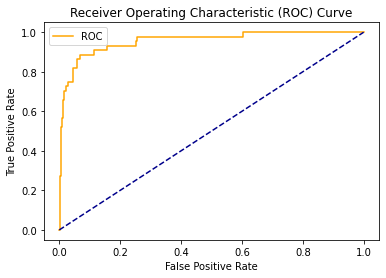

------------------------------------------------------ 
 test set
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1319
           1       0.21      0.89      0.34        44

    accuracy                           0.89      1363
   macro avg       0.60      0.89      0.64      1363
weighted avg       0.97      0.89      0.92      1363



In [39]:
#18 random state has the best AUC. Therefore, we want to generate a logistic regression model with the 6 features that we found using catboost model.

log_reg = LogisticRegression(class_weight='balanced', max_iter=10000)
X = x_training_set[important_features[18]]
log_model = log_reg.fit(X, y_training_set)
log_pred = log_model.predict(x_test_set[important_features[18]])

#plot a ROC Curve
probs = log_model.predict_proba(x_test_set[important_features[18]])
positive_probs = probs[:, 1]
auc = roc_auc_score(y_test_set, positive_probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test_set, positive_probs)
plot_roc_curve(fpr, tpr)

print('------------------------------------------------------ \n test set')
print(classification_report(y_test_set, log_pred))

#When we look at the classification report, the result is the same the catboost model using 12 features. Since this logistic model has less features, we want to use this logistic model. Also, the AUC is higher with this model.

In [40]:
#These are the 6 features.
important_features[18]

0                                net worth/assets
1                      net income to total assets
2                       Cash flow to total assets
3                       tax Pre-net interest rate
4                   current liability / liability
5     inventory and accounts receivable/net value
Name: Feature Id, dtype: object

In [41]:
log_model.coef_[0]

#All the features have a negative relation.

array([-1.69184791e+01, -1.50299289e+01, -4.57858586e+00, -8.40367570e-04,
       -6.62203275e-01, -2.28619476e-01])

<AxesSubplot:xlabel='Bankrupt?'>

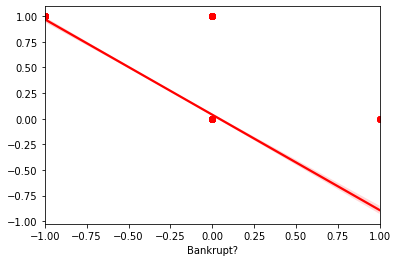

In [42]:
residuals = y_test_set-log_pred

sns.regplot(x = residuals, y = log_pred, data = None, scatter = True, color = 'red')

In [45]:
y_test_set

3749    1
3908    1
4071    1
4154    1
4264    1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt?, Length: 1363, dtype: int64

In [44]:
log_pred

array([1, 1, 1, ..., 0, 0, 0])